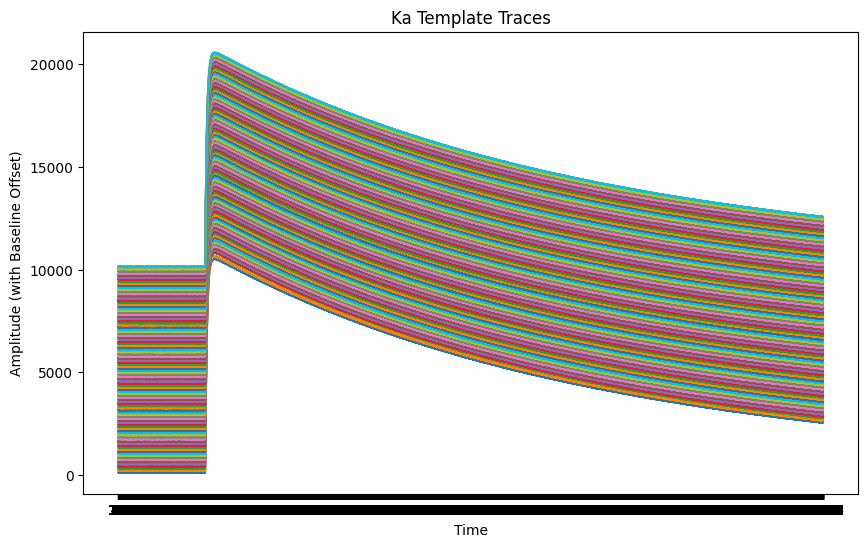

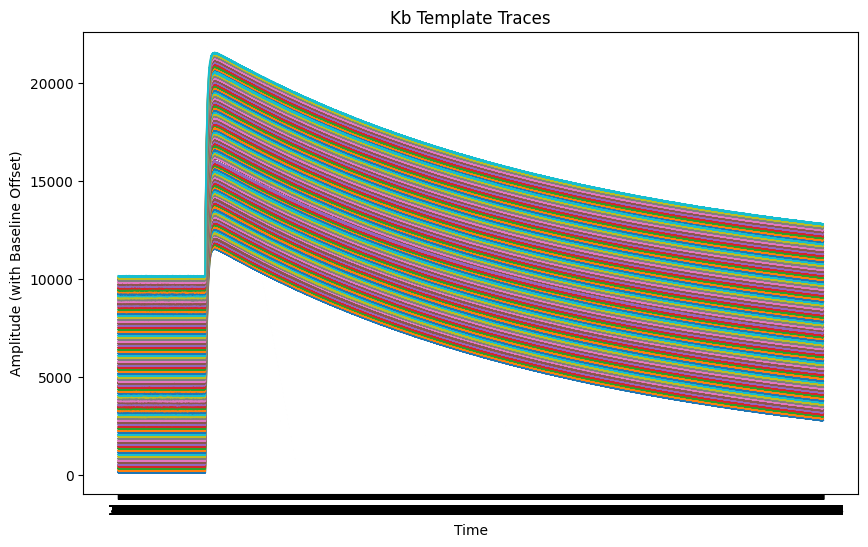

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_traces(csv_file, title):
    df = pd.read_csv(csv_file)
    num_traces = df.shape[0]
    baseline_offsets = np.linspace(0, num_traces * 100, num_traces)  # Spacing traces vertically
    
    plt.figure(figsize=(10, 6))
    for i in range(num_traces):
        plt.plot(df.iloc[i] + baseline_offsets[i], label=f'Trace {i+1}')
    
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude (with Baseline Offset)")
    plt.show()

# Read CSV and plot traces
plot_traces("Ka_template_traces.csv", "Ka Template Traces")
plot_traces("Kb_template_traces.csv", "Kb Template Traces")


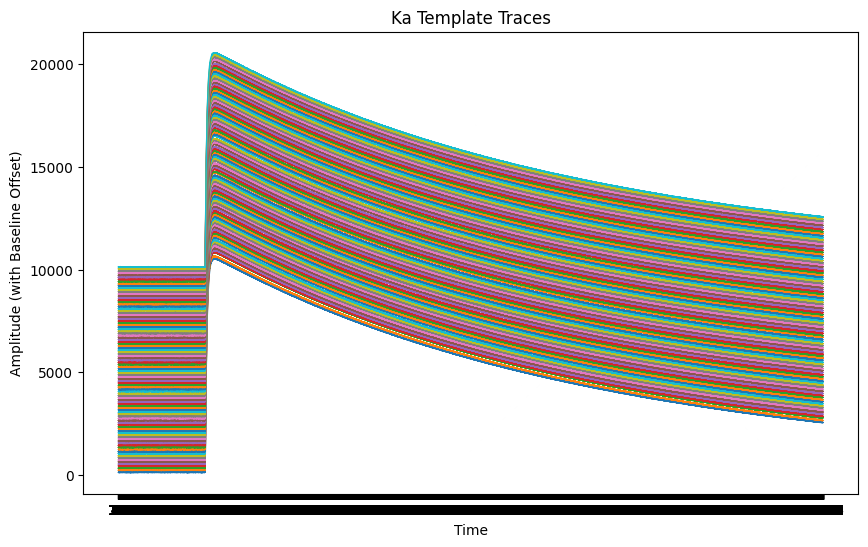

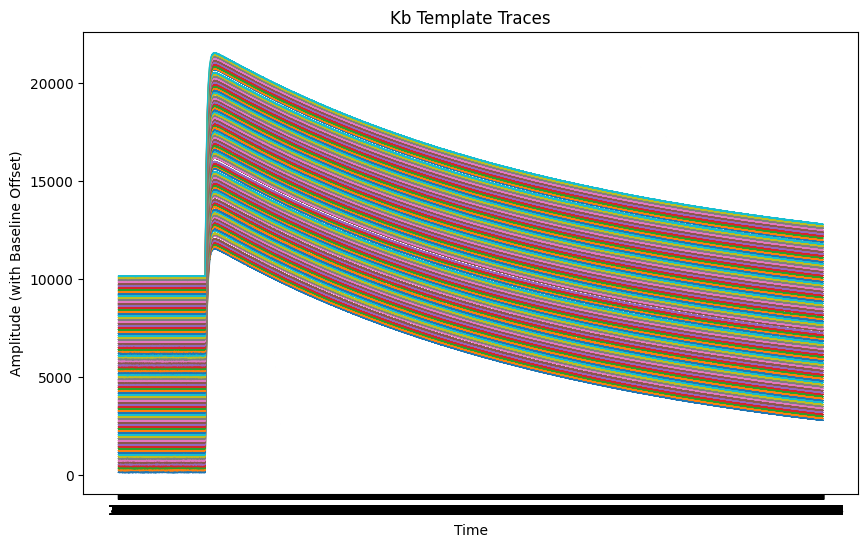

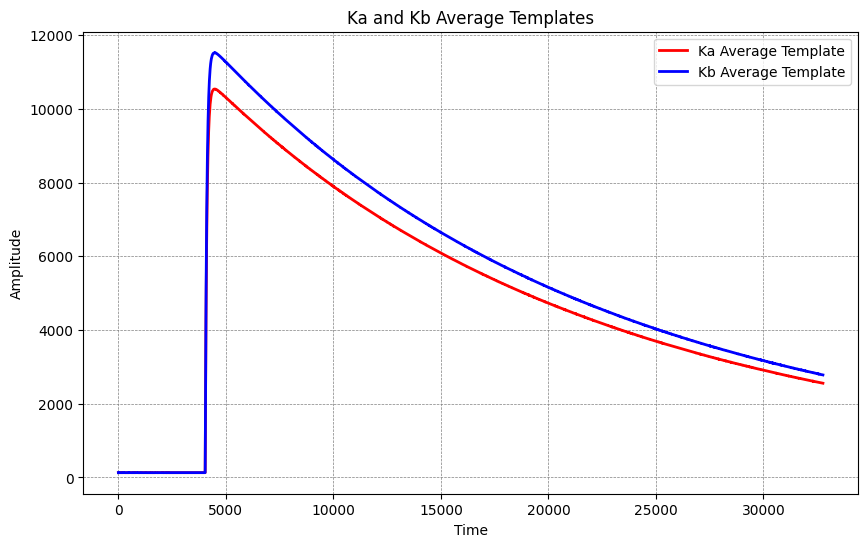

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')  # Reset any unusual styling

def plot_traces(csv_file, title):
    df = pd.read_csv(csv_file)
    df = df.loc[:, df.columns != 'Unnamed: 0']  # Remove any unexpected index column
    df = df.dropna()  # Remove any NaN values
    num_traces = df.shape[0]
    baseline_offsets = np.linspace(0, num_traces * 100, num_traces)  # Spacing traces vertically
    
    plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
    for i in range(num_traces):
        plt.plot(df.iloc[i] + baseline_offsets[i], label=f'Trace {i+1}', linewidth=1)
    
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude (with Baseline Offset)")
    plt.show()

def compute_average_template(csv_file):
    df = pd.read_csv(csv_file)
    df = df.loc[:, df.columns != 'Unnamed: 0']  # Remove any unexpected index column
    df = df.dropna()  # Remove any NaN values
    avg_trace = df.mean(axis=0).to_numpy()  # Convert to NumPy array
    return avg_trace

def plot_combined_templates(file1, file2):
    ka_avg_trace = compute_average_template(file1)
    kb_avg_trace = compute_average_template(file2)
    
    plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
    plt.plot(ka_avg_trace, label="Ka Average Template", color="red", linewidth=2)
    plt.plot(kb_avg_trace, label="Kb Average Template", color="blue", linewidth=2)
    
    plt.title("Ka and Kb Average Templates")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Ensure proper grid formatting
    plt.show()


# Plot combined templates
plot_combined_templates("Ka_template_traces.csv", "Kb_template_traces.csv")

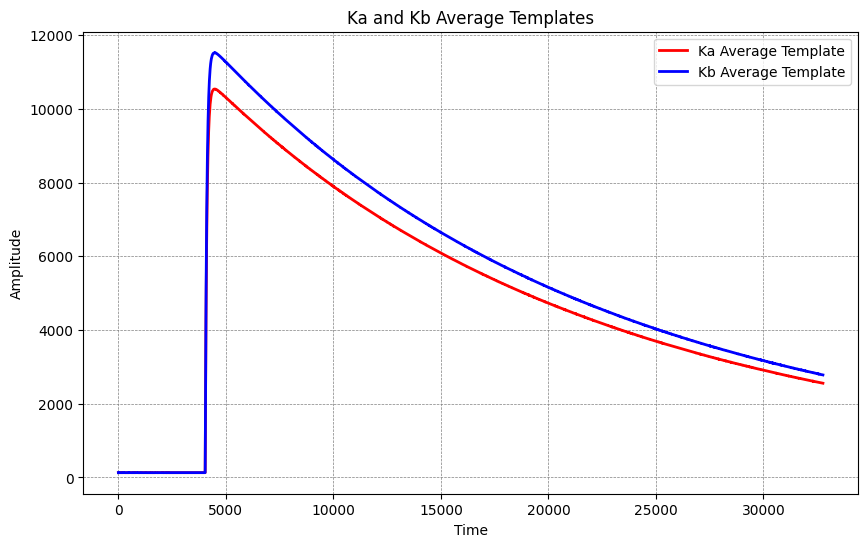

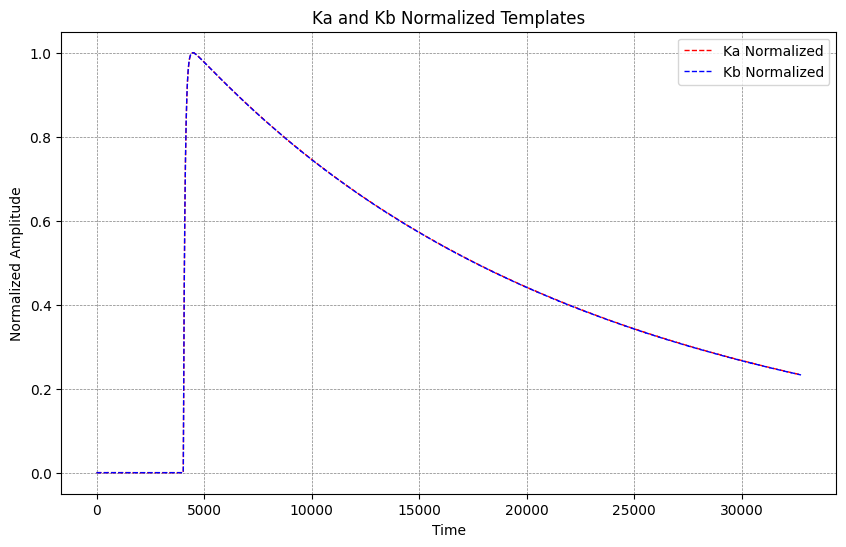

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')  # Reset any unusual styling

def plot_traces(csv_file, title):
    df = pd.read_csv(csv_file)
    df = df.loc[:, df.columns != 'Unnamed: 0']  # Remove any unexpected index column
    df = df.dropna()  # Remove any NaN values
    num_traces = df.shape[0]
    baseline_offsets = np.linspace(0, num_traces * 100, num_traces)  # Spacing traces vertically
    
    plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
    for i in range(num_traces):
        plt.plot(df.iloc[i] + baseline_offsets[i], label=f'Trace {i+1}', linewidth=1)
    
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude (with Baseline Offset)")
    plt.show()

def compute_average_template(csv_file):
    df = pd.read_csv(csv_file)
    df = df.loc[:, df.columns != 'Unnamed: 0']  # Remove any unexpected index column
    df = df.dropna()  # Remove any NaN values
    avg_trace = df.mean(axis=0).to_numpy()  # Convert to NumPy array
    return avg_trace

def normalize_template(template):
    return (template - np.min(template)) / (np.max(template) - np.min(template))

def plot_templates_separately(file1, file2):
    ka_avg_trace = compute_average_template(file1)
    kb_avg_trace = compute_average_template(file2)
    
    ka_norm_trace = normalize_template(ka_avg_trace)
    kb_norm_trace = normalize_template(kb_avg_trace)
    
    # Plot original templates
    plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
    plt.plot(ka_avg_trace, label="Ka Average Template", color="red", linewidth=2)
    plt.plot(kb_avg_trace, label="Kb Average Template", color="blue", linewidth=2)
    
    plt.title("Ka and Kb Average Templates")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Ensure proper grid formatting
    plt.show()
    
    # Plot normalized templates
    plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
    plt.plot(ka_norm_trace, label="Ka Normalized", color="red", linestyle="--", linewidth=1)
    plt.plot(kb_norm_trace, label="Kb Normalized", color="blue", linestyle="--", linewidth=1)
    
    plt.title("Ka and Kb Normalized Templates")
    plt.xlabel("Time")
    plt.ylabel("Normalized Amplitude")
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Ensure proper grid formatting
    plt.show()

# Plot templates separately
plot_templates_separately("Ka_template_traces.csv", "Kb_template_traces.csv")
